In [123]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Exercice 1

In [125]:
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP2/spam7.csv'
df = pd.read_csv(path, sep=';')
df

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


In [44]:

path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP2/spam7.csv'
df = pd.read_csv(path, sep=';')

#Attribution 0,1
df['yesno'] = df['yesno'].map({'y':1,'n':0})

X = df.drop(columns='yesno',axis=1)
Y = df['yesno']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Définir le modèle
model = Sequential()

earlystopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Ajouter la couche cachée avec la fonction d'activation ReLU
# Vous devez spécifier le nombre de neurones dans la couche cachée (par exemple, 32)
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # ajoute une couche de neurone
model.add(Dropout(0.25))

model.add(Dense(16, input_dim=32, activation='relu')) # ajoute une couche de neurone
model.add(Dropout(0.5))

# Ajouter la couche de sortie avec la fonction d'activation sigmoïde
# Puisque c'est une classification binaire, il n'y a qu'un seul neurone dans la couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
# Utiliser un optimiseur comme 'adam' et une fonction de perte 'binary_crossentropy' pour une classification binaire
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss= pour l'évaluation de la sortie à chaque étape
# optimizer= algo pour changer les poids de manière ittératif

# Entraîner le modèle
# Vous pouvez ajuster les paramètres 'epochs' et 'batch_size' selon vos besoins
history =  model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test,Y_test),callbacks=[earlystopping])
# epochs=100 signifie que l'ensemble de données d'entraînement sera passé à travers le réseau 100 fois.
# batch_size=10 signifie que le modèle prendra 10 échantillons de vos données à chaque fois pour faire une mise à jour de l'apprentissage.


# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_train, Y_train)
print(f'TRAIN DATA = Loss: {loss}, Accuracy: {accuracy}')

# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'TEST DATA = Loss: {loss}, Accuracy: {accuracy}')





Epoch 1/100
368/368 [==============================] - 2s 2ms/step - loss: 12.0217 - accuracy: 0.5182 - val_loss: 0.6750 - val_accuracy: 0.6037
Epoch 2/100
368/368 [==============================] - 1s 2ms/step - loss: 2.2531 - accuracy: 0.5967 - val_loss: 0.6717 - val_accuracy: 0.6037
Epoch 3/100
368/368 [==============================] - 1s 2ms/step - loss: 1.2889 - accuracy: 0.6079 - val_loss: 0.6716 - val_accuracy: 0.6037
Epoch 4/100
368/368 [==============================] - 1s 2ms/step - loss: 0.8076 - accuracy: 0.6136 - val_loss: 0.6717 - val_accuracy: 0.6037
Epoch 5/100
368/368 [==============================] - 1s 2ms/step - loss: 0.8307 - accuracy: 0.6073 - val_loss: 0.6719 - val_accuracy: 0.6037
Epoch 6/100
368/368 [==============================] - 1s 2ms/step - loss: 0.8171 - accuracy: 0.6103 - val_loss: 0.6719 - val_accuracy: 0.6037
Epoch 7/100
368/368 [==============================] - 1s 2ms/step - loss: 0.8000 - accuracy: 0.6106 - val_loss: 0.6719 - val_accuracy: 0.603

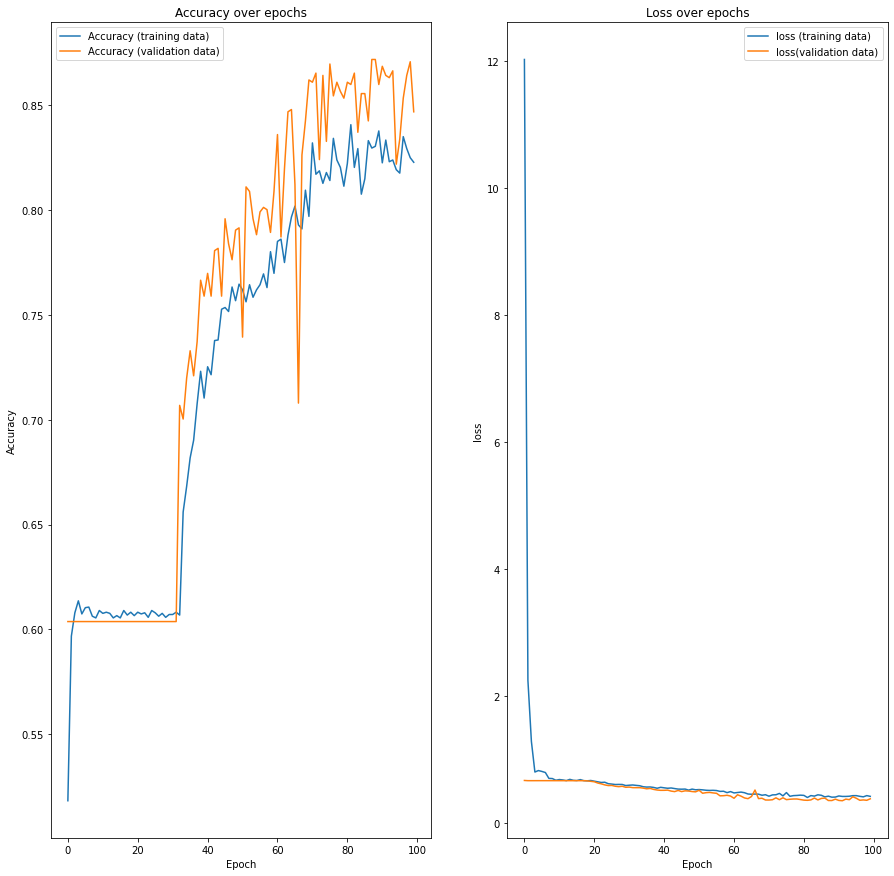

In [47]:

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss (training data)')
plt.plot(history.history['val_loss'], label='loss(validation data)')
plt.title('Loss over epochs')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [48]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                224       
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Exercice 2

Epoch 1/100
250/250 [==============================] - 3s 10ms/step - loss: 13.4472 - accuracy: 0.8350 - val_loss: 4.5812 - val_accuracy: 0.9015
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 2.1628 - accuracy: 0.9233 - val_loss: 1.8742 - val_accuracy: 0.9305
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 1.2569 - accuracy: 0.9329 - val_loss: 2.0053 - val_accuracy: 0.9295
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 1.0058 - accuracy: 0.9442 - val_loss: 1.9037 - val_accuracy: 0.9300
Epoch 5/100
250/250 [==============================] - 2s 9ms/step - loss: 0.9480 - accuracy: 0.9498 - val_loss: 1.6136 - val_accuracy: 0.9300
Epoch 6/100
250/250 [==============================] - 2s 8ms/step - loss: 0.8211 - accuracy: 0.9541 - val_loss: 1.7164 - val_accuracy: 0.9340
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 0.7244 - accuracy: 0.9555 - val_loss: 1.6928 - val_accuracy: 0.93

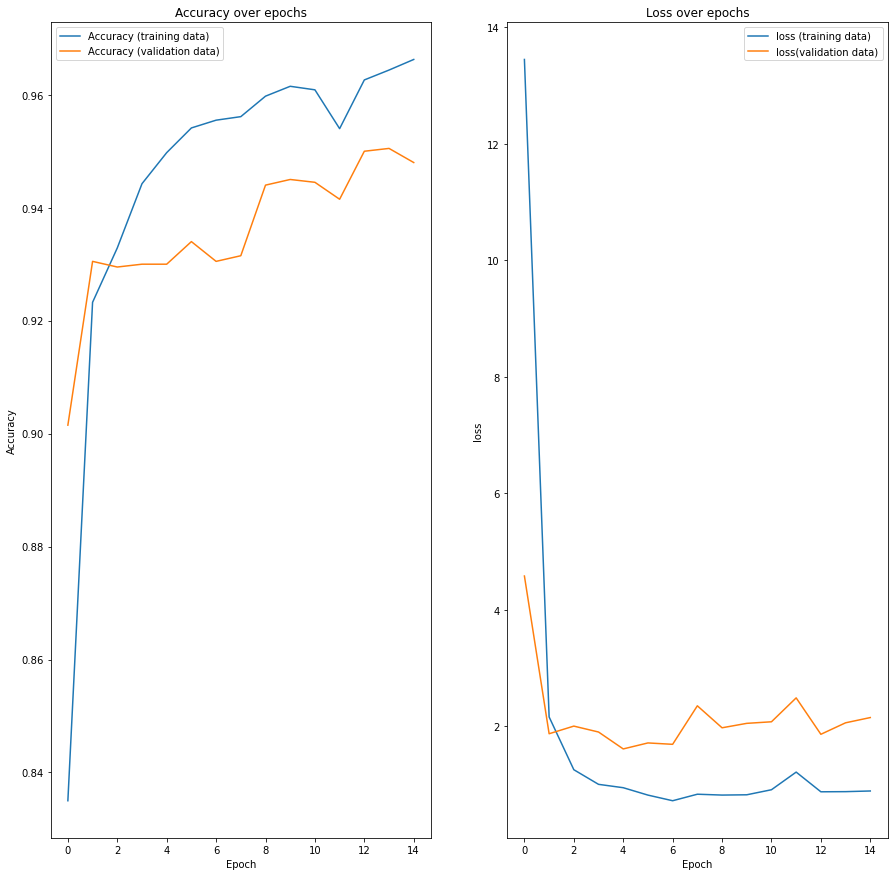

In [57]:

path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP1_KNN/Donnees_knn'
df2 = pd.read_csv(os.path.join(path,'mnist_test.csv'),header=None)


X = df2.drop(columns=0,axis=1)
Y = df2[0]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

nb_classes = Y_train.nunique() # nb d'éléments unique

model = Sequential()

# Créer un callback EarlyStopping
# Monitor = 'val_loss' signifie que vous surveillez la perte de validation pour décider de l'arrêt
# Patience = 10 signifie que l'entraînement s'arrêtera s'il n'y a pas d'amélioration de 'val_loss' pendant 10 époques consécutives
earlystopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


# Ajouter la couche cachée avec la fonction d'activation ReLU
# Vous devez spécifier le nombre de neurones dans la couche cachée 
model.add(Dense(784, input_dim=X_train.shape[1], activation='relu')) # ajoute une couche de neurone
model.add(Dropout(0.25))# Ajouter le dropout, par exemple avec un taux de 0.5

#model.add(Dense(250, input_dim=X_train.shape[1], activation='relu')) # ajoute une couche de neurone
#model.add(Dropout(0.5))# Ajouter le dropout, par exemple avec un taux de 0.5

# Ajouter la couche de sortie avec la fonction d'activation softmax
# Le nombre de neurones dans la couche de sortie doit correspondre au nombre de classes
model.add(Dense(nb_classes, activation='softmax'))

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
history =  model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test,Y_test),callbacks=[earlystopping])

# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_train, Y_train)
print(f'TRAIN DATA = Loss: {loss}, Accuracy: {accuracy}')

# Évaluer le modèle sur les données de test
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'TEST DATA = Loss: {loss}, Accuracy: {accuracy}')

# Tracer l'accuracy
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss (training data)')
plt.plot(history.history['val_loss'], label='loss(validation data)')
plt.title('Loss over epochs')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [58]:
import tensorflow as tf
import keras

model.save('/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP1_KNN/Donnees_knn/location.keras')
model_charge = keras.models.load_model('/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP1_KNN/Donnees_knn/location.keras')


In [59]:
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP1_KNN/Donnees_knn'

dataframe = pd.read_csv(os.path.join(path,'mnist_train.csv'), header=None)

dataframe

X = dataframe.drop(columns=0,axis=1)
Y = dataframe[0]

# Évaluer le modèle sur les données de test
loss, accuracy = model_charge.evaluate(X, Y)
print(f'TRAIN DATA = Loss: {loss}, Accuracy: {accuracy}')

1875/1875 [==============================] - 4s 2ms/step - loss: 3.1691 - accuracy: 0.9360
TRAIN DATA = Loss: 3.169070243835449, Accuracy: 0.9360499978065491


# Exercice 3

In [60]:
import numpy as np
import keras
from keras import layers


In [91]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 #normalisation
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1) pour 
x_train = np.expand_dims(x_train, -1) # -1 pour qu'on lui laisse déterminer la dimension
x_test = np.expand_dims(x_test, -1)

(28, 28, 1)


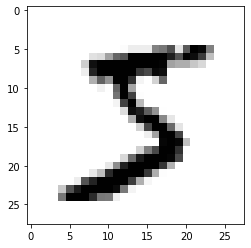

In [92]:
plt.imshow(x_train[0],cmap='gray_r')
print(x_train[0].shape)

In [93]:
# convert class vectors to binary class matrices
# One Hot encodind
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [96]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_23 (Dropout)        (None, 1600)            

In [98]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 17s 40ms/step - loss: 0.1056 - accuracy: 0.9676 - val_loss: 0.0541 - val_accuracy: 0.9852
Epoch 2/15
422/422 [==============================] - 18s 43ms/step - loss: 0.0781 - accuracy: 0.9759 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 3/15
422/422 [==============================] - 19s 44ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 4/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0372 - val_accuracy: 0.9898
Epoch 5/15
422/422 [==============================] - 20s 47ms/step - loss: 0.0511 - accuracy: 0.9842 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0335 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 18s 43ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0335 - val_accuracy:

In [99]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.022668058052659035
Test accuracy: 0.9918000102043152


In [100]:
x_test_predict = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


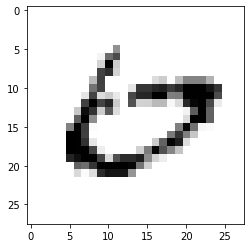

PRED = 0
TRUE =  6


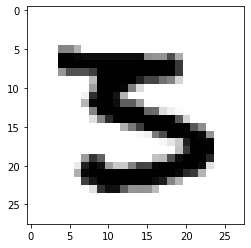

PRED = 5
TRUE =  3


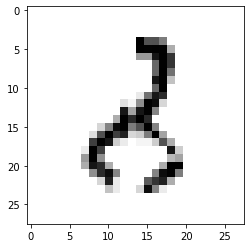

PRED = 2
TRUE =  8


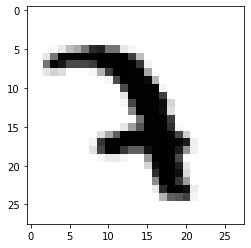

PRED = 2
TRUE =  7


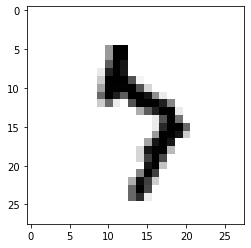

PRED = 5
TRUE =  7


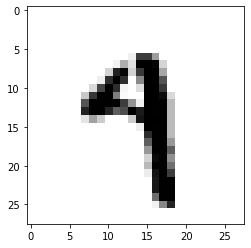

PRED = 9
TRUE =  4


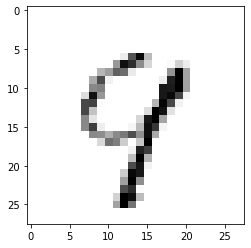

PRED = 7
TRUE =  9


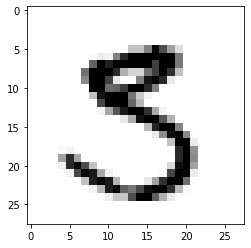

PRED = 5
TRUE =  3


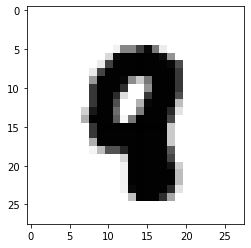

PRED = 9
TRUE =  8


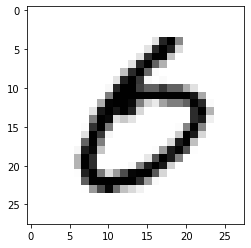

PRED = 0
TRUE =  6


In [122]:
y_mauvais= y_test[x_test_predict.argmax(axis=1) !=y_test.argmax(axis=1)]
y_mauvaise_pred = x_test_predict[x_test_predict.argmax(axis=1) !=y_test.argmax(axis=1)]
x_mauvaise_pred = x_test[x_test_predict.argmax(axis=1) !=y_test.argmax(axis=1)]

for i in range(10):
    plt.imshow(mauvaise_pred[i],cmap='gray_r')
    plt.show()
    print('PRED =',y_mauvaise_pred[i].argmax())
    print('TRUE = ',y_mauvais[i].argmax())